In [ ]:
pip install yfinance pandas numpy scikit-learn matplotlib tensorflow


In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [ ]:
# Download S&P 500 (^GSPC) data
df = yf.download('^GSPC', start='2020-01-01', end='2024-12-31')
print(df.head())


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price             Close         High          Low         Open      Volume
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC       ^GSPC
Date                                                                      
2020-01-02  3257.850098  3258.139893  3235.530029  3244.669922  3459930000
2020-01-03  3234.850098  3246.149902  3222.340088  3226.360107  3484700000
2020-01-06  3246.280029  3246.840088  3214.639893  3217.550049  3702460000
2020-01-07  3237.179932  3244.909912  3232.429932  3241.860107  3435910000
2020-01-08  3253.050049  3267.070068  3236.669922  3238.590088  3726840000


In [ ]:
data = df['Close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)


In [ ]:
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i - time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_data)
X = X.reshape((X.shape[0], X.shape[1], 1))  # reshape for LSTM


In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X, y, epochs=10, batch_size=32)


Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.0635
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0019
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 7.8052e-04
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 6.7224e-04
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - loss: 6.5262e-04
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 6.1790e-04
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 6.1749e-04
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 6.0888e-04
Epoch 9/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 5.7377e-04
Epoch 10/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - loss: 5.4410e-04


In [ ]:
predicted = model.predict(X)
predicted = scaler.inverse_transform(predicted)
real = scaler.inverse_transform(y.reshape(-1, 1))


38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step


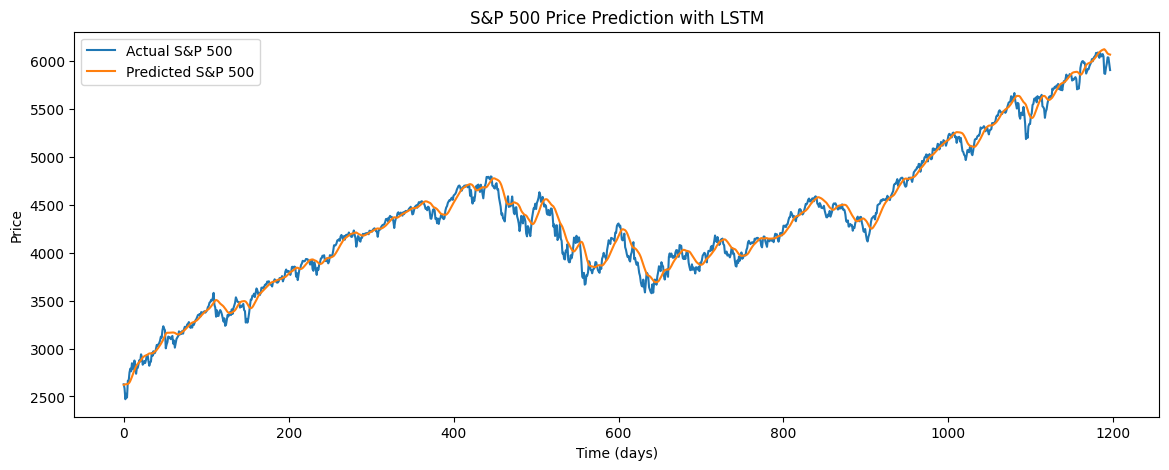

In [ ]:
plt.figure(figsize=(14, 5))
plt.plot(real, label='Actual S&P 500')
plt.plot(predicted, label='Predicted S&P 500')
plt.title('S&P 500 Price Prediction with LSTM')
plt.xlabel('Time (days)')
plt.ylabel('Price')
plt.legend()
plt.show()


Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 5.7602e-04
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 5.4000e-04
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 5.4820e-04
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - loss: 5.2351e-04
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 5.4711e-04
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 5.3340e-04
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 5.4842e-04
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 6.0339e-04
Epoch 9/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 4.8248e-04
Epoch 10/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - loss: 5.0422e-04
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


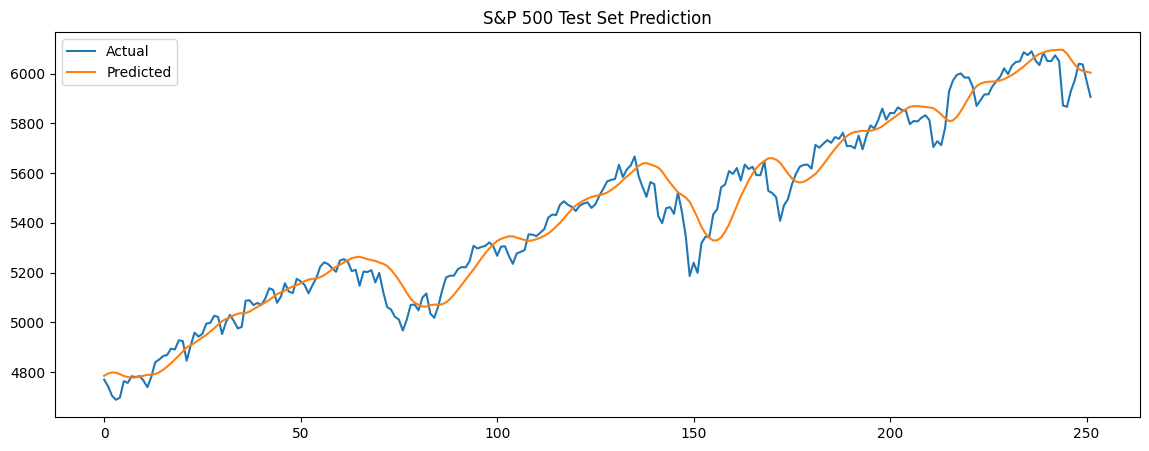

In [ ]:
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size - 60:]

X_train, y_train = create_dataset(train_data)
X_test, y_test = create_dataset(test_data)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

model.fit(X_train, y_train, epochs=10, batch_size=32)

predicted_test = model.predict(X_test)
predicted_test = scaler.inverse_transform(predicted_test)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

plt.figure(figsize=(14, 5))
plt.plot(y_test_actual, label='Actual')
plt.plot(predicted_test, label='Predicted')
plt.title('S&P 500 Test Set Prediction')
plt.legend()
plt.show()
